In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stores  =  pd.read_csv("D:/IDMP/Project TS/stores.csv")
trans   =  pd.read_csv("D:/IDMP/Project TS/transactions.csv") 
oil     =  pd.read_csv("D:/IDMP/Project TS/oil.csv")
train   =  pd.read_csv("D:/IDMP/Project TS/train.csv")
holiday =  pd.read_csv("D:/IDMP/Project TS/holidays_events.csv")

df1 = train.merge(stores,how = 'left', on='store_nbr')
df2 = df1.merge(trans, how = 'left', on = ['date','store_nbr'])
df3 = df2.merge(oil, how = 'left', on='date')
df = df3.merge(holiday, how='left', on='date')

df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [3]:
df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
transactions     249117
dcoilwtico       955152
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

In [4]:
df = df.drop(['type_y','locale','locale_name','description','transferred'], axis=1)
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN


In [5]:
df['date'] = pd.to_datetime(df['date'])

#### Handling missing values of Transactions:

In [6]:
#considering the dataframe with all null values of transcations
df[df['transactions'].isnull()]

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0.0,Quito,Pichincha,D,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2838523,2790409,2017-04-19,52,POULTRY,0.0,0.0,Manta,Manabi,A,11,NaN,50.49
2838524,2790410,2017-04-19,52,PREPARED FOODS,0.0,0.0,Manta,Manabi,A,11,NaN,50.49
2838525,2790411,2017-04-19,52,PRODUCE,0.0,0.0,Manta,Manabi,A,11,NaN,50.49
2838526,2790412,2017-04-19,52,SCHOOL AND OFFICE SUPPLIES,0.0,0.0,Manta,Manabi,A,11,NaN,50.49


In [7]:
#setting date as index
df = df.set_index('date')

In [8]:
#viewing missing transactions for a month
df['2013-01-01':'2013-02-01']

,id,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,dcoilwtico
date,,,,,,,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
2013-01-01,1,1,BABY CARE,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
2013-01-01,2,1,BEAUTY,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
2013-01-01,3,1,BEVERAGES,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
2013-01-01,4,1,BOOKS,0.000,0.0,Quito,Pichincha,D,13,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2013-02-01,57019,9,POULTRY,411.242,0.0,Quito,Pichincha,B,6,2031.0,97.46
2013-02-01,57020,9,PREPARED FOODS,62.000,0.0,Quito,Pichincha,B,6,2031.0,97.46
2013-02-01,57021,9,PRODUCE,0.000,0.0,Quito,Pichincha,B,6,2031.0,97.46


In [9]:
#create a copy of original dataframe
df_na = df.copy()

#remove all the null valued from the new df
df_na = df_na.dropna()

##### To understand the nature of transactions, we will use autocorrelation plot

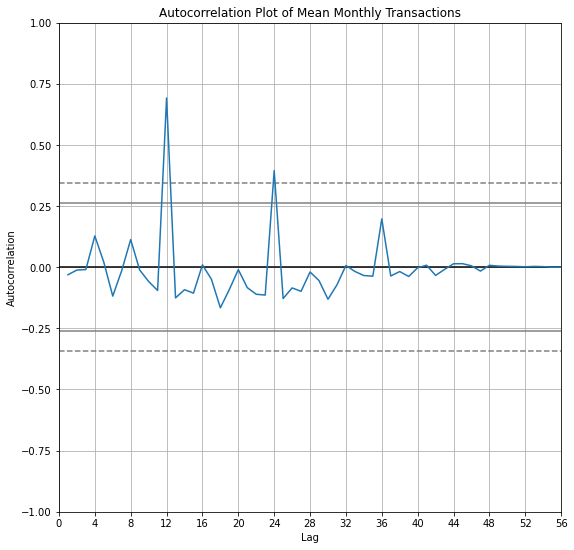

In [10]:
#autocorrelation plot of transaction from 2013 to 2017 sampled over every month
plt.figure(figsize=(9,9))
pd.plotting.autocorrelation_plot(df_na['2013':'2017']['transactions'].resample('1m').mean())
plt.xticks(np.arange(0,60,4))
plt.title('Autocorrelation Plot of Mean Monthly Transactions')
plt.show()

##### Lag in this case indicates months since transctions are sampled fo every month from 2013 to 2017.
##### From the plot: There is a peak in the transcations for every 4 months, indicating there is correlation of transactions every 4 months = seasonality.
##### Hence we can impute the transactions values fo every 4 montrhs with the mean transaction values of  last day of 3rd month. 
##### In order to do so, we have to create subset of the dataframe for every 4 months

##### Since there might be unpredictable transactions because of holidays or any events i.e there can some factors affecting the seasonality of transactions.
##### So to check that we use lag plot which gives the correlation of transactions for different time lags

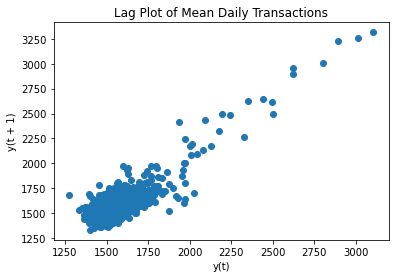

In [11]:
#sampling the transactions for everyday and visulizing the lag plot
pd.plotting.lag_plot(df_na['transactions'].resample('1D').mean(), lag=1)
plt.title('Lag Plot of Mean Daily Transactions')
plt.show()

##### Here in the graph we are looking at the correlation between the mean transactions of current day y(t+1) to mean transcations of previous day y(t)
##### Since this shows linearity between a trasactions on current day and transaction on the previous day.
##### This confirms that we can impute the null values in the transactions with mean transaction of previous day 


##### For almost every year each day has 1782 records and We will impute the transcation values with mean of previous day taking 1782 record values as rolling window size

In [12]:
df1 = df.drop(['dcoilwtico','family','type_x','city','state'], axis=1)

In [13]:
df1.isnull().sum()

id                   0
store_nbr            0
sales                0
onpromotion          0
cluster              0
transactions    249117
dtype: int64

In [14]:
#imputing null values transactions with mean of the previous day
df1 = df1.rolling(window=1782, min_periods=1).mean()

In [15]:
df1.isnull().sum()

id                0
store_nbr         0
sales             0
onpromotion       0
cluster           0
transactions    926
dtype: int64

In [16]:
df1 = pd.concat([df1,df[['dcoilwtico','family','type_x','city','state']]],axis=1)

In [17]:
#Since the remaining null values are all from 2013-01-01, we can impute those values with mean values of  2013-01-02
#df1 = df1.fillna(df[((df.index.year ==2013) & (df.index.day ==2) & (df.index.month==1))]['transactions'].mean())
df1 = df1.fillna(0)
df1.isnull().sum()

id              0
store_nbr       0
sales           0
onpromotion     0
cluster         0
transactions    0
dcoilwtico      0
family          0
type_x          0
city            0
state           0
dtype: int64

In [18]:
df1 = df1.fillna(method='ffill')
df1 = df1.fillna(method='bfill')
df1.isnull().sum()

id              0
store_nbr       0
sales           0
onpromotion     0
cluster         0
transactions    0
dcoilwtico      0
family          0
type_x          0
city            0
state           0
dtype: int64

In [19]:
df1['transactions'] = round(df1['transactions'])

<AxesSubplot:>

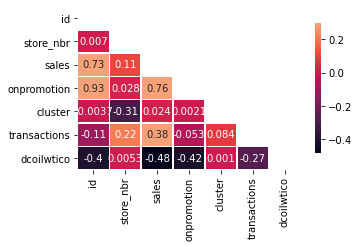

In [20]:
Corr = df1.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(Corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5,3))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Corr,cmap='rocket', mask = mask,vmax=.3, center=0, linewidths=.5, cbar_kws={"shrink": .8}, annot = True)

In [21]:
df2 = df1.reset_index()

In [22]:
df_trans_month = df2.groupby([pd.Grouper(key='date',freq='D')]).agg(trans_mean = ('transactions','mean'))
df_trans_month = df_trans_month.reset_index()
df_trans_month['trans_mean'] = round(df_trans_month['trans_mean'])
df_trans_month.head()

,date,trans_mean
0,2013-01-01,528.0
1,2013-01-02,1736.0
2,2013-01-03,1892.0
3,2013-01-04,1691.0
4,2013-01-05,1843.0


In [23]:
df_sales_month = df2.groupby([pd.Grouper(key='date',freq='D')]).agg(sales_mean = ('sales','mean'))
df_sales_month = df_sales_month.reset_index()
df_sales_month.head()

,date,sales_mean
0,2013-01-01,1.604608
1,2013-01-02,118.030945
2,2013-01-03,248.961345
3,2013-01-04,199.312673
4,2013-01-05,227.326058


In [24]:
dfa = df_trans_month.merge(df_sales_month, on='date')
dfa = dfa.dropna()
dfa.head()

,date,trans_mean,sales_mean
0,2013-01-01,528.0,1.604608
1,2013-01-02,1736.0,118.030945
2,2013-01-03,1892.0,248.961345
3,2013-01-04,1691.0,199.312673
4,2013-01-05,1843.0,227.326058


In [25]:
#dfa.reset_index()
dfa['year'] = dfa['date'].dt.year

In [26]:
dfa.to_csv(r'D:\IDMP\file3.csv', index=False)

<Figure size 1440x1440 with 0 Axes>

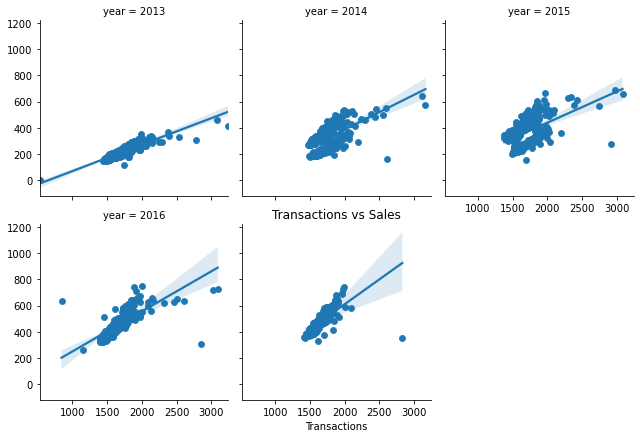

In [27]:
plt.figure(figsize=(20,20))
g = sns.FacetGrid(dfa, col="year",palette="husl",col_wrap=3)
g.map_dataframe(sns.scatterplot, x="trans_mean", y="sales_mean")
g.map_dataframe(sns.regplot, x="trans_mean", y="sales_mean")

plt.xlabel("Transactions")
plt.ylabel("Sales")
plt.title("Transactions vs Sales")
plt.show()


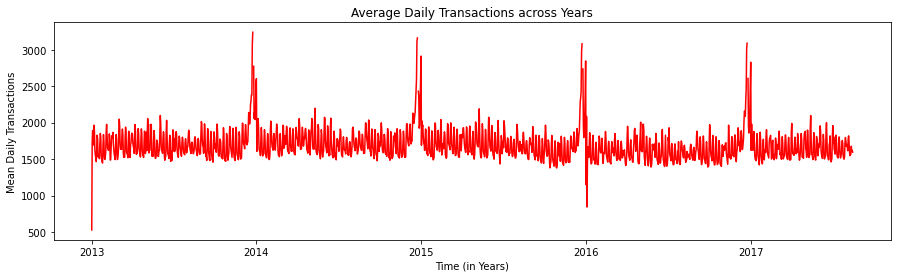

In [28]:
plt.figure(figsize=(15,4))
ax = plt.axes()
plt.plot('date','trans_mean',data=df_trans_month, c='r')
#ax.set_facecolor('#eafff5')
plt.xlabel("Time (in Years)")
plt.ylabel("Mean Daily Transactions")
plt.title("Average Daily Transactions across Years")
plt.show()

##### Seasonality = There is a peak in the transactions at the start of every year

In [29]:
dft = df_trans_month.set_index('date')

In [30]:
dfa = dfa.set_index('date')

In [31]:
df1.head()

,id,store_nbr,sales,onpromotion,cluster,transactions,dcoilwtico,family,type_x,city,state
date,,,,,,,,,,,
2013-01-01,0.0,1.0,0.0,0.0,13.0,0.0,0.0,AUTOMOTIVE,D,Quito,Pichincha
2013-01-01,0.5,1.0,0.0,0.0,13.0,0.0,0.0,BABY CARE,D,Quito,Pichincha
2013-01-01,1.0,1.0,0.0,0.0,13.0,0.0,0.0,BEAUTY,D,Quito,Pichincha
2013-01-01,1.5,1.0,0.0,0.0,13.0,0.0,0.0,BEVERAGES,D,Quito,Pichincha
2013-01-01,2.0,1.0,0.0,0.0,13.0,0.0,0.0,BOOKS,D,Quito,Pichincha


In [ ]:
#boxplot of launch mass
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.boxplot(dfa['trans_mean'])
plt.text(0.6,1650,'Median:{:.2f}'.format(dfa['trans_mean'].median()))
plt.title("Boxplot of Transactions")
plt.ylabel("Transactions")

#histogram of launch mass
plt.subplot(2,2,2)
plt.hist(dfa['trans_mean'], bins=30, alpha=0.5, color='b',edgecolor='k')
#Drawing a line to show the mean
plt.axvline(dfa['trans_mean'].mean(), linestyle='dashed', color='k')
plt.text(1900,350,'Mean:{:.2f}'.format(dfa['trans_mean'].mean()))
plt.title("Distribution of Transactions")
plt.xlabel("Transactions")
plt.ylabel("Count")
plt.show()